In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
import pandas as pd

In [2]:
train_images = pd.read_csv("../input/digit-recognizer/train.csv")
test_images = pd.read_csv("../input/digit-recognizer/test.csv")
Y = train_images["label"]
train_images.drop(["label"],axis=1,inplace=True)
train_images = train_images.values.reshape(-1,28,28,1)
test_images = test_images.values.reshape(-1,28,28,1)

In [3]:
Y = pd.get_dummies(Y,prefix='Num')

Y

,Num_0,Num_1,Num_2,Num_3,Num_4,Num_5,Num_6,Num_7,Num_8,Num_9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
41995,1,0,0,0,0,0,0,0,0,0
41996,0,1,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,1,0,0
41998,0,0,0,0,0,0,1,0,0,0


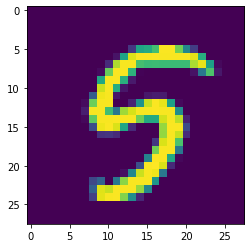

In [4]:
plt.imshow(train_images[8])


In [5]:
train_images = train_images.reshape((42000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((28000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [6]:
# train_images, val_images = train_images[:30000], train_images[30000:]
# Y_train, Y_val = Y[:30000], Y[30000:]

In [7]:
# val_images.shape

In [8]:
train_images = train_images.reshape((-1, 28, 28, 1))

In [9]:
model = models.Sequential([
    layers.Conv2D(32, (2, 2), activation='relu', input_shape = [28,28,1]),
    layers.Conv2D(32, (4, 4), strides=1, activation='relu'), 
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (2, 2), strides=1, activation='relu'),
    layers.Conv2D(64, (4, 4), strides=1, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), strides=1, activation='relu'), 
    layers.BatchNormalization(),
    
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
    ])
model.summary()


2022-10-31 17:32:17.883115: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 17:32:18.044230: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 17:32:18.045067: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 17:32:18.046536: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 32)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        16416     
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        8256      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          65600     
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 64)          2

In [10]:
model.compile(
        optimizer='adam',
        loss=tf.losses.CategoricalCrossentropy(),
        metrics=['acc']
    )

In [11]:
model.fit(train_images,Y,epochs=5)

2022-10-31 17:32:21.422996: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2022-10-31 17:32:23.065007: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1313/1313 [==============================] - 13s 4ms/step - loss: 0.1161 - acc: 0.9640
Epoch 2/5
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0491 - acc: 0.9848
Epoch 3/5
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0389 - acc: 0.9881
Epoch 4/5
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0302 - acc: 0.9905
Epoch 5/5
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0250 - acc: 0.9928


In [12]:
# pred = model.predict(val_images.reshape((-1, 28, 28, 1)))
# sum(pred.argmax(axis=1) == Y_val.to_numpy().argmax(axis=1))/12000

In [13]:
tahmin = model.predict(test_images.reshape(-1,28,28,1))
tahmin[0]
tahmin.shape

(28000, 10)

In [14]:
import numpy as np
predict = []
for i in range(tahmin.shape[0]):
    predict.append(np.argmax(tahmin[i]))
predict = pd.DataFrame(predict)
sub = pd.read_csv("../input/digit-recognizer/sample_submission.csv")
image_id = sub[["ImageId"]]

In [15]:
submission = pd.concat([image_id,predict],axis=1)
submission.columns = ["ImageId","Label"]
submission.to_csv("Submission.csv",index=False)